# Introduction to Convolutional Neural Networks and Computer Vision

In [ ]:
# Uncomment this to install scipy when running inside cuda containers
# !pip install scipy

## Get the data

In [ ]:
import zipfile
import urllib.request
from os.path import exists

if (not exists("./datasets/pizza_steak.zip")):
    print("Downloading archive...")
    urllib.request.urlretrieve("https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip", "./datasets/pizza_steak.zip")
else:
    print("Archive already downloaded, unzipping...")

zip_ref = zipfile.ZipFile("datasets/pizza_steak.zip")
zip_ref.extractall("./datasets")
zip_ref.close()

## Inspect the data

It's crucial to understand the data before building any model on it

In [ ]:
!ls datasets/pizza_steak/

In [ ]:
!ls datasets/pizza_steak/train

In [ ]:
!ls datasets/pizza_steak/train/steak

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("datasets/pizza_steak"):
    print(f"There are {len(dirnames)} directories on {len(filenames)} files in {dirpath}")

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("datasets/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("[!.DS_Store]*")])) # Create a list of classnames from the subdirectories

print(class_names)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + "/" + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])

    fig, ax = plt.subplots(figsize=(10,10))
    plt.title(target_class)
    ax.imshow(img)
    ax.axis("off");

    return img

img = view_random_image("datasets/pizza_steak/train", "pizza")

In [ ]:
img.shape

## An end to end example

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from plot import plot_loss_curve

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir = "datasets/pizza_steak/train"
test_dir = "datasets/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    shuffle=True,
    target_size=(224,224),
    class_mode="binary",
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    shuffle=True,
    target_size=(224,224),
    class_mode="binary",
    seed=42
)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

model_1.save("saved_models/conv_1")

plot_loss_curve(history)

In [ ]:
model_1.summary()

In [ ]:
img = view_random_image("datasets/pizza_steak/train", "pizza")

# Data augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_augmented = ImageDataGenerator(rescale=1/255., rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [5]:
# Setup paths to data directories
train_dir = "datasets/pizza_steak/train"
test_dir = "datasets/pizza_steak/test"

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size=(244, 244), batch_size=32, class_mode="binary", shuffle=False)
train_data = train_datagen.flow_from_directory(train_dir, target_size=(244, 244), batch_size=32, class_mode="binary", shuffle=False)

# create non augmented test data
test_data = test_datagen.flow_from_directory(test_dir, target_size=(244, 244), batch_size=32, class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [6]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


<Figure size 640x480 with 0 Axes>

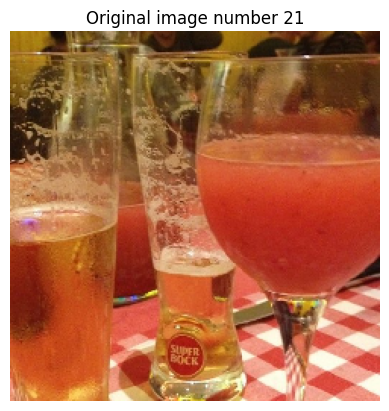

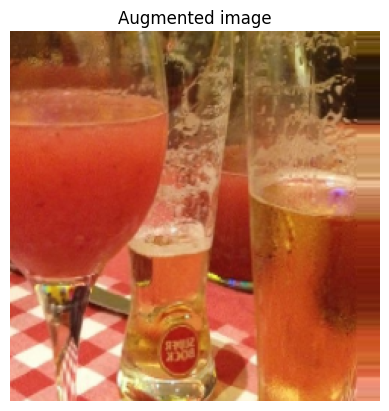

<Figure size 640x480 with 0 Axes>

In [7]:
# Show the original image and the augmented image
import random
import matplotlib.pyplot as plt
random_n = random.randint(0, 32)
plt.imshow(images[random_n])
plt.title(f"Original image number {random_n}")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_n])
plt.title(f"Augmented image")
plt.axis(False)
plt.figure()


## Use augmented data to train the model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

# Fit the model

history_6 = model_6.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

In [ ]:
# Check training curves
from plot import plot_loss_curve
plot_loss_curve(history_6)

In [8]:
# Maybe let's shuffle the training data

# Setup paths to data directories
train_dir = "datasets/pizza_steak/train"
test_dir = "datasets/pizza_steak/test"

train_data_augmented_and_shuffled = train_datagen_augmented.flow_from_directory(train_dir, target_size=(244, 244), batch_size=32, class_mode="binary", shuffle=True)

# create non augmented test data
test_data = test_datagen.flow_from_directory(test_dir, target_size=(244, 244), batch_size=32, class_mode="binary", shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(244, 244, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=Adam())

# Fit the model

history_7 = model_7.fit(train_data_augmented_and_shuffled, epochs=5, steps_per_epoch=len(train_data_augmented_and_shuffled), validation_data=test_data, validation_steps=len(test_data))

In [ ]:
# Check training curves
from plot import plot_loss_curve
plot_loss_curve(history_7)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(244, 244, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=Adam())

# Fit the model

history_8 = model_8.fit(train_data_augmented_and_shuffled, epochs=5, steps_per_epoch=len(train_data_augmented_and_shuffled), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 39s 814ms/step - loss: 0.6662 - accuracy: 0.5927 - val_loss: 0.4860 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 40s 845ms/step - loss: 0.5414 - accuracy: 0.7533 - val_loss: 0.4025 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 56s 1s/step - loss: 0.5351 - accuracy: 0.7533 - val_loss: 0.4129 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 60s 1s/step - loss: 0.5344 - accuracy: 0.7467 - val_loss: 0.4215 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 59s 1s/step - loss: 0.5063 - accuracy: 0.7687 - val_loss: 0.3663 - val_accuracy: 0.8620


--2022-09-05 22:07:06--  https://idealistfoods.com/wp-content/uploads/2018/07/Recipe_Grilled_Steak_with_Zaatar_optimized.jpg
Resolving idealistfoods.com (idealistfoods.com)... 35.208.162.162
Connecting to idealistfoods.com (idealistfoods.com)|35.208.162.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1624500 (1,5M) [image/jpeg]
Saving to: ‘Recipe_Grilled_Steak_with_Zaatar_optimized.jpg.1’

Recipe_Grilled_Stea 100%[===================>]   1,55M  1,75MB/s    in 0,9s    

2022-09-05 22:07:08 (1,75 MB/s) - ‘Recipe_Grilled_Steak_with_Zaatar_optimized.jpg.1’ saved [1624500/1624500]



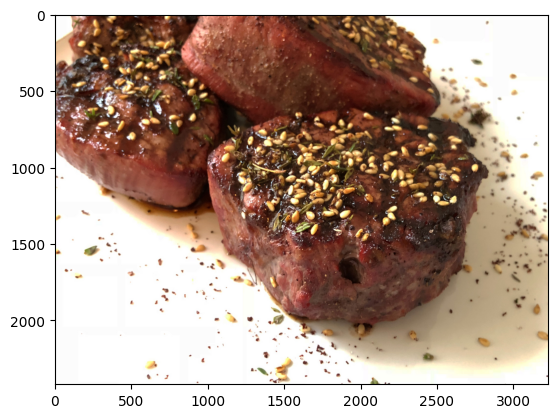

In [10]:
# Try to use the model to evaluate some images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://idealistfoods.com/wp-content/uploads/2018/07/Recipe_Grilled_Steak_with_Zaatar_optimized.jpg
steak = mpimg.imread("Recipe_Grilled_Steak_with_Zaatar_optimized.jpg")
plt.imshow(steak)

In [12]:
import tensorflow as tf
expanded_steak = tf.expand_dims(steak, axis=0)
expanded_steak.shape

TensorShape([1, 2419, 3226, 3])

In [13]:
# Write an helper to adapt custom images to the shape required by the model

def load_and_prep_image(filename, shape=[244, 244]):
    """Loads and rescales an image to target shape"""
    img = tf.io.read_file(filename)
    
    # decode into a tensor
    img = tf.image.decode_image(img)

    # resize
    img = tf.image.resize(img, size=shape)
    
    # rescale values
    img = img / 255

    return img

In [14]:
test_file = "Recipe_Grilled_Steak_with_Zaatar_optimized.jpg"
test_img = load_and_prep_image(test_file)
test_img

<tf.Tensor: shape=(244, 244, 3), dtype=float32, numpy=
array([[[0.9882353, 0.9882353, 0.9882353],
        [0.9882353, 0.9882353, 0.9882353],
        [0.9882353, 0.9882353, 0.9882353],
        ...,
        [0.9882353, 0.9882353, 0.9882353],
        [0.9882353, 0.9882353, 0.9882353],
        [0.9882353, 0.9882353, 0.9882353]],

       [[0.9882353, 0.9882353, 0.9882353],
        [0.9882353, 0.9882353, 0.9882353],
        [0.9882353, 0.9882353, 0.9882353],
        ...,
        [0.9882353, 0.9882353, 0.9882353],
        [0.9882353, 0.9882353, 0.9882353],
        [0.9882353, 0.9882353, 0.9882353]],

       [[0.9882353, 0.9882353, 0.9882353],
        [0.9882353, 0.9882353, 0.9882353],
        [0.9882353, 0.9882353, 0.9882353],
        ...,
        [0.9882353, 0.9882353, 0.9882353],
        [0.9882353, 0.9882353, 0.9882353],
        [0.9882353, 0.9882353, 0.9882353]],

       ...,

       [[0.9882353, 0.9882353, 0.9882353],
        [0.9882353, 0.9882353, 0.9882353],
        [0.9882353, 0.98823

In [15]:
model_8.predict(tf.expand_dims(test_img, axis=0))

1/1 [==============================] - 0s 138ms/step


array([[0.97640264]], dtype=float32)

In this case 0.7 means class 1 of [0,1], which is steak

In [18]:
def pred_and_plot(model, filename, class_names=['pizza', 'steak']):
    img = load_and_prep_image(filename)

    pred = model.predict(tf.expand_dims(img, axis=0))

    pred_class = class_names[int(tf.round(pred))]

    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);


1/1 [==============================] - 0s 23ms/step


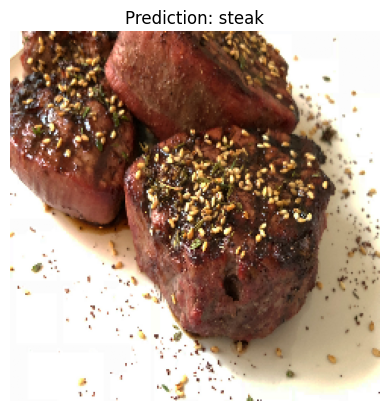

In [19]:
pred_and_plot(model_8, "Recipe_Grilled_Steak_with_Zaatar_optimized.jpg")